## Importação e Inspeção Inicial dos Dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Carrega o CSV
df = pd.read_csv("TESLA.csv")

# Mostra as primeiras linhas
print("Primeiras 5 linhas do DataFrame:")
print(df.head())

# Informações sobre o DataFrame
print("\nInformações do DataFrame:")
df.info()

# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(df.describe())

Primeiras 5 linhas do DataFrame:
   Unnamed: 0     Date      Open      High       Low     Close  Adj Close  \
0           0  6/29/10  1.266667  1.666667  1.169333  1.592667   1.592667   
1           1  6/30/10  1.719333  2.028000  1.553333  1.588667   1.588667   
2           2   7/1/10  1.666667  1.728000  1.351333  1.464000   1.464000   
3           3   7/2/10  1.533333  1.540000  1.247333  1.280000   1.280000   
4           4   7/6/10  1.333333  1.333333  1.055333  1.074000   1.074000   

      Volume  
0  281494500  
1  257806500  
2  123282000  
3   77097000  
4  103003500  

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3637 entries, 0 to 3636
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3637 non-null   int64  
 1   Date        3637 non-null   object 
 2   Open        3637 non-null   float64
 3   High        3637 non-null   float64
 4   Low         3637 non-null   fl

## Limpeza e Preparação dos Dados

In [2]:
# Remover a primeira coluna (índices)
df.drop(columns=df.columns[0], axis=1, inplace=True)

# Converter a coluna 'Date' para o tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

# Define a coluna 'Date' como índice
df.set_index('Date', inplace=True)

# Verificando as alterações
print("\nDataFrame após limpeza e preparação:")
print(df.head())
print("\nInformações do DataFrame:")
df.info()


DataFrame após limpeza e preparação:
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3637 entries, 2010-06-29 to 2024-12-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3637 non-null   float64
 1   High       3637 non-null   float64
 2   Low        3637 non-null   float64
 3   Close      3637 non-null   float64
 4   Adj Close  3637 non-null   float64
 5   Volume     3637

## Análise Exploratória de Dados (EDA

### Variação dos Preços de Abertura, Máximo, Mínimo e Fechamento

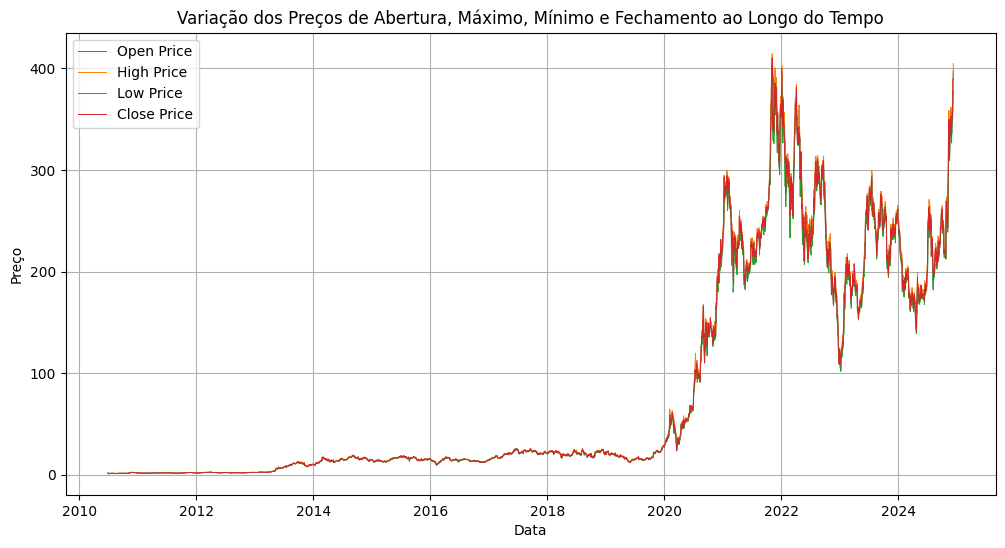

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Open'], label='Open Price', linewidth=0.7)
plt.plot(df.index, df['High'], label='High Price', linewidth=0.7)
plt.plot(df.index, df['Low'], label='Low Price', linewidth=0.7)
plt.plot(df.index, df['Close'], label='Close Price', linewidth=0.7)

plt.title('Variação dos Preços de Abertura, Máximo, Mínimo e Fechamento ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.grid(True)
plt.show()

**Interpretação**

Os preços da Tesla tiveram um crescimento expressivo ao longo do período, com algumas flutuações notáveis.

As linhas de preço 'Open', 'High', 'Low' e 'Close' apresentam um comportamento muito semelhante.

### Variação do Volume de Negociação

Vamos analisar como o volume de negociação mudou ao longo do tempo.

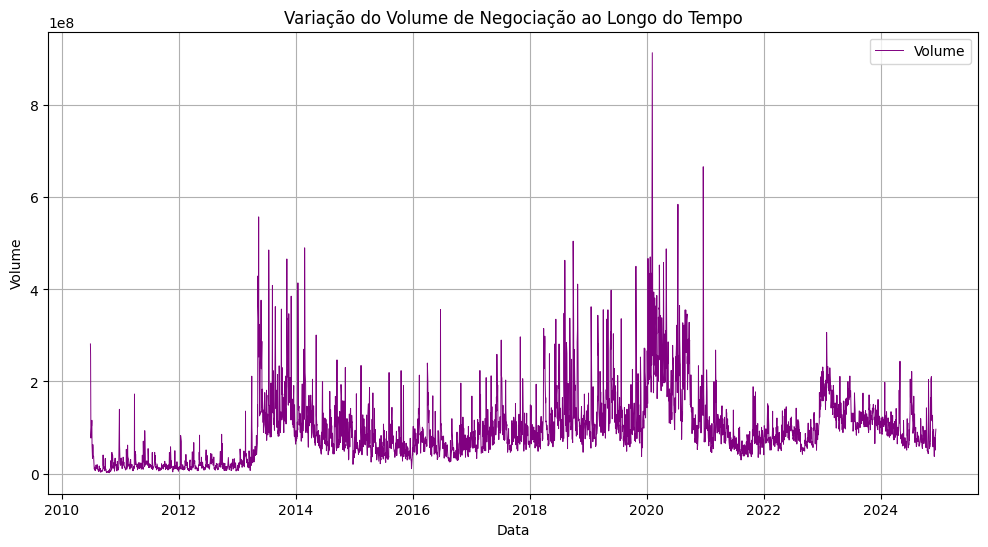

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volume'], label='Volume', color='purple', linewidth=0.7)
plt.title('Variação do Volume de Negociação ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

**Interpretação**

O volume de negociação mostra altos picos em determinados periodos, indicando momentos de grande atividade no mercado.

Há períodos de alta volatilidade (altos e baixos volumes) que são visíveis ao longo do tempo.

### Comparação entre Preço de Fechamento Ajustado e Preço de Fechamento

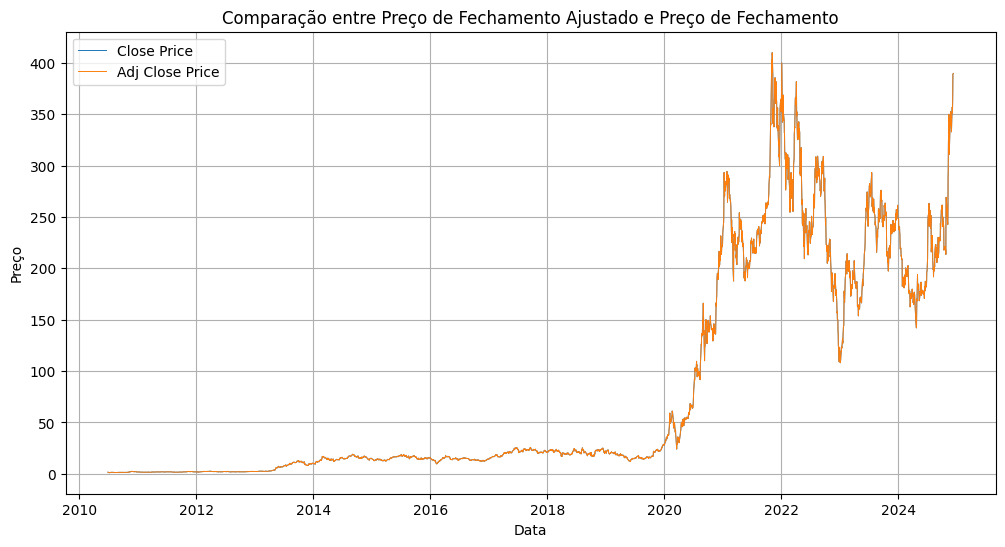

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price', linewidth=0.7)
plt.plot(df.index, df['Adj Close'], label='Adj Close Price', linewidth=0.7)
plt.title('Comparação entre Preço de Fechamento Ajustado e Preço de Fechamento')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.grid(True)
plt.show()

**Interpretação**

'Close' e 'Adj Close' são exatamente iguais. Isso significa que não houve ajustes no preço ao longo do tempo.

 ### Análise de Boxplot para Preços e Volume

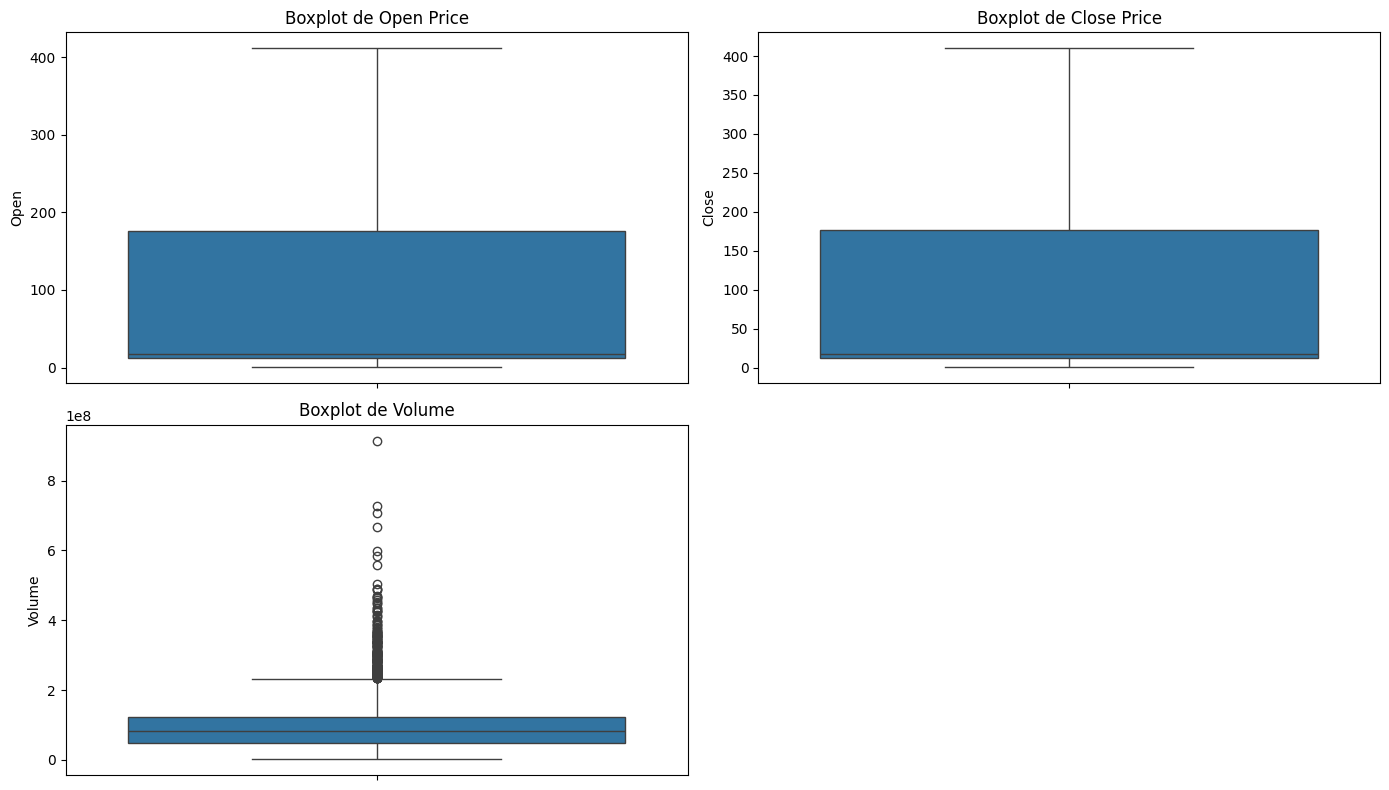

In [6]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
sns.boxplot(y=df['Open'])
plt.title('Boxplot de Open Price')

plt.subplot(2, 2, 2)
sns.boxplot(y=df['Close'])
plt.title('Boxplot de Close Price')

plt.subplot(2, 2, 3)
sns.boxplot(y=df['Volume'])
plt.title('Boxplot de Volume')

plt.tight_layout()
plt.show()

**Interpretação**

Os boxplots mostram a presença de outliers, especialmente no volume, indicando negociações de volumes muito acima da média.

Os preços também apresentam outliers, mas em menor número e com valores bem mais altos que as médias.

### Correlação entre as Variáveis

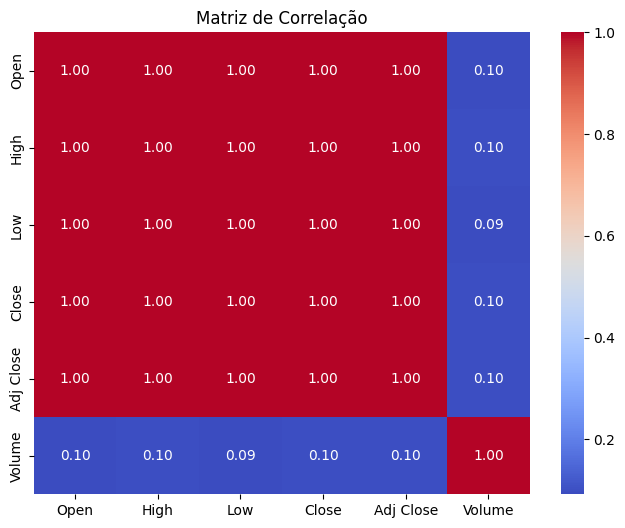

In [7]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

**Interpretação**

Existe uma forte correlação positiva entre 'Open', 'High', 'Low' e 'Close' prices (como esperado).

A correlação entre o volume e as outras colunas (preços) é relativamente baixa.

###  Insights e Conclusões

* **Tendência de Alta:** Os preços das ações da Tesla mostraram um aumento substancial durante o período analisado. Isso reflete o crescimento da empresa ao longo do tempo.
* **Volatilidade:** O volume de negociação apresentou picos ao longo do tempo, indicando períodos de grande interesse e atividade de mercado na ação da Tesla.

* **Outliers:** Há outliers nos dados de volume e preço, o que pode ser um sinal de eventos específicos (notícias, resultados financeiros, etc).

* **Correlação:** Os preços de abertura, máxima, mínima e fechamento têm alta correlação entre si, o que é esperado. O volume não apresenta grande correlação com os preços.

##  Análise de Séries Temporais

In [ ]:
!pip install pmdarima

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=21722.229, Time=2.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21720.185, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=21718.788, Time=0.35 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21718.884, Time=1.49 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=21719.008, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=21720.043, Time=1.73 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=21718.276, Time=1.99 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=21720.196, Time=2.56 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=21720.191, Time=2.28 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=21720.135, Time=0.97 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=21717.136, Time=0.58 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=21717.756, Time=0.26 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=21717.660, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=21719.049, Time=1.00 sec
 ARIMA(1,1,2)(0,0,0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


RMSE: 66.23992863970795


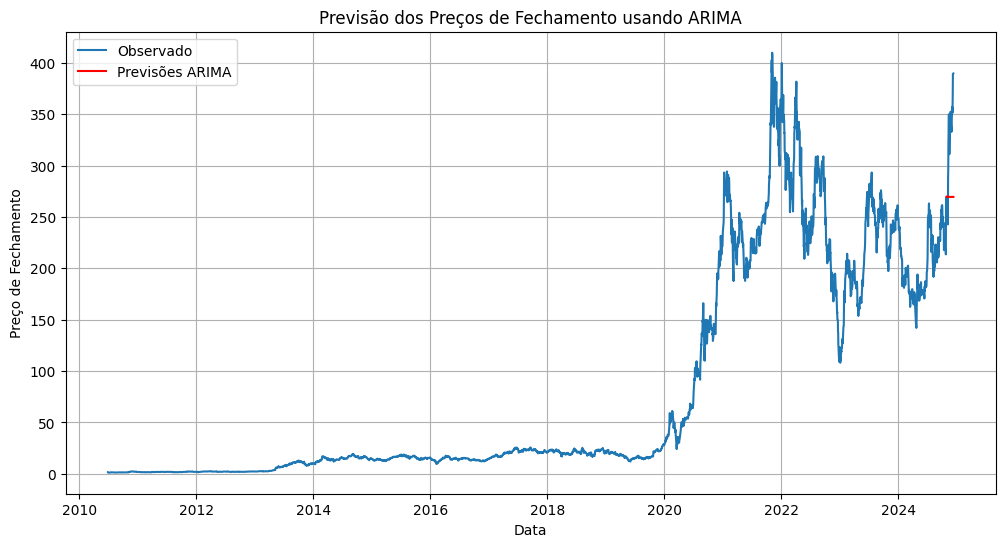

In [9]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from pmdarima.arima import auto_arima

# Separar os dados em treino e teste
train_data = df['Close'][:-30] # Todas as linhas, menos as ultimas 30
test_data = df['Close'][-30:] # As ultimas 30 linhas

# Encontrar os melhores parâmetros ARIMA automaticamente
auto_model = auto_arima(train_data, seasonal=False, trace=True, suppress_warnings=True)
print(f"Melhores parâmetros ARIMA: {auto_model.order}")

# Construir e treinar o modelo ARIMA
model = ARIMA(train_data, order=auto_model.order)
model_fit = model.fit()

# Fazer previsões
predictions = model_fit.predict(start=len(train_data), end=len(df)-1, typ='levels')

# Avaliar o modelo (RMSE)
rmse = sqrt(mean_squared_error(test_data, predictions))
print(f'RMSE: {rmse}')

# Visualizar os resultados
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Observado')
plt.plot(test_data.index, predictions, label='Previsões ARIMA', color='red')
plt.title('Previsão dos Preços de Fechamento usando ARIMA')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.grid(True)
plt.show()

**Interpretação da Análise ARIMA**

* Determinação dos Parâmetros: Foi usado o auto_arima para encontrar os melhores parâmetros (p, d, q) para o modelo.

* Treinamento e Previsão: O modelo foi treinado com os dados de treino e fez previsões para os últimos 30 dias.

* RMSE: O valor do RMSE dá uma ideia de quão bem o modelo está ajustando os dados reais.

* Visualização: O gráfico mostra a comparação entre os valores reais e as previsões.

## Análise de Volatilidade

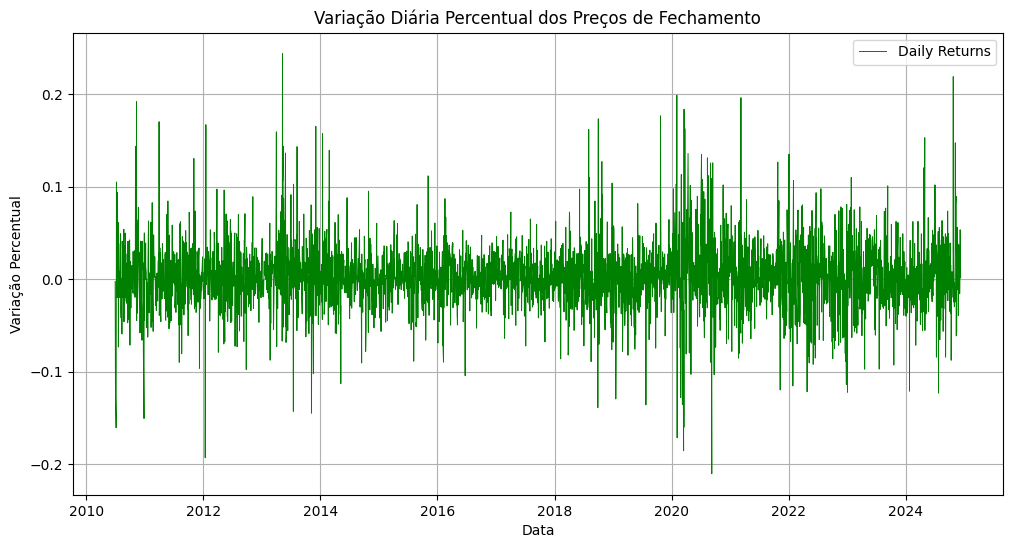


Estatísticas da variação diária:
count    3636.000000
mean        0.002161
std         0.036103
min        -0.210628
25%        -0.016076
50%         0.001256
75%         0.019397
max         0.243951
Name: Daily Return, dtype: float64


In [10]:
# Calcula a variação percentual diária
df['Daily Return'] = df['Close'].pct_change()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Daily Return'], label='Daily Returns', color='green', linewidth=0.7)
plt.title('Variação Diária Percentual dos Preços de Fechamento')
plt.xlabel('Data')
plt.ylabel('Variação Percentual')
plt.legend()
plt.grid(True)
plt.show()

# Analisa as estatísticas da variação
print("\nEstatísticas da variação diária:")
print(df['Daily Return'].describe())

**Interpretação da Análise de Volatilidade**

* O gráfico mostra os altos e baixos da variação diária dos preços.

* As estatísticas da variação fornecem uma visão quantitativa da volatilidade, como média e desvio padrão.

## Análise de Eventos

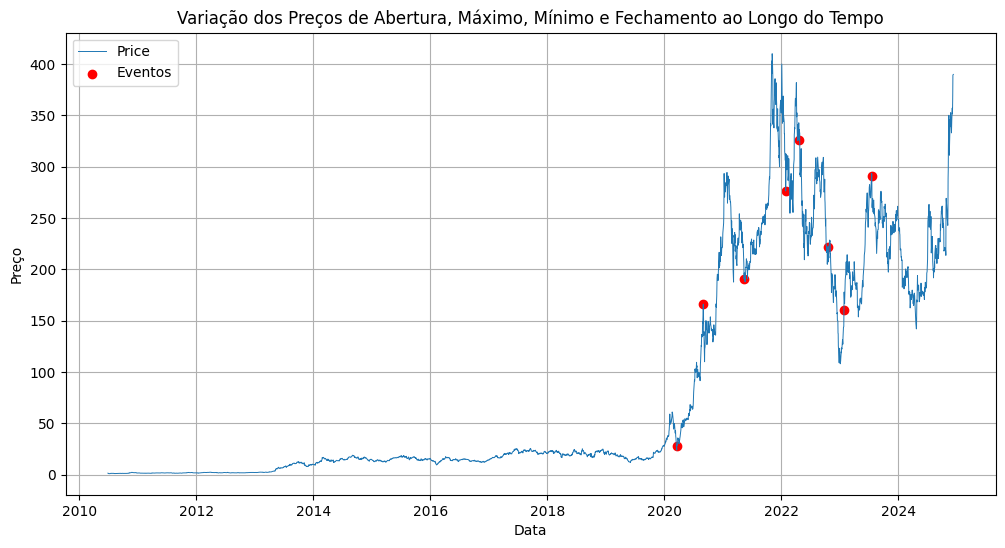

In [11]:
# DataFrame com datas de eventos relevantes
eventos = pd.DataFrame({
    'data': pd.to_datetime([
        '2020-03-19',  # Queda do mercado causada pela pandemia
        '2020-08-31',  # Anúncio do desdobramento de ações
        '2021-05-13',  # Venda de ações em relação ao bitcoin
        '2022-01-27',  # Resultado do Q4 2021
        '2022-04-20',   # Resultado do Q1 2022
        '2022-10-19',  # Resultado do Q3 2022
        '2023-01-26',   # Resultado do Q4 2022
        '2023-07-19',  # Resultado do Q2 2023
    ])})

eventos.set_index('data', inplace=True)

# Inclui as datas no dataframe original
df_events = df.copy()
df_events = df_events.reset_index()
df_events['event_point'] = df_events['Date'].isin(eventos.index).astype(int)
df_events.set_index('Date', inplace=True)
df_events = df_events.sort_index()

# Plot do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_events.index, df_events['Close'], label='Price', linewidth=0.7)
plt.scatter(df_events[df_events['event_point'] == 1].index, df_events[df_events['event_point'] == 1]['Close'], color='red', marker='o', label = 'Eventos')

plt.title('Variação dos Preços de Abertura, Máximo, Mínimo e Fechamento ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.grid(True)
plt.show()

**Interpretação da Análise de Eventos**

* O gráfico marca pontos específicos onde houve eventos relevantes.

* A analise visual permite verificar como o mercado reagiu aos eventos, seja com alta ou queda do valor da ação.

## Aprimoramento dos Modelos de Séries Temporais

DEBUG:cmdstanpy:input tempfile: /tmp/tmpqcm00v5z/qt3qw22z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqcm00v5z/rr9z1o8i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79591', 'data', 'file=/tmp/tmpqcm00v5z/qt3qw22z.json', 'init=/tmp/tmpqcm00v5z/rr9z1o8i.json', 'output', 'file=/tmp/tmpqcm00v5z/prophet_modelsrnkn3qr/prophet_model-20250109202410.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:24:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:24:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE (Prophet): 144.2470533954638


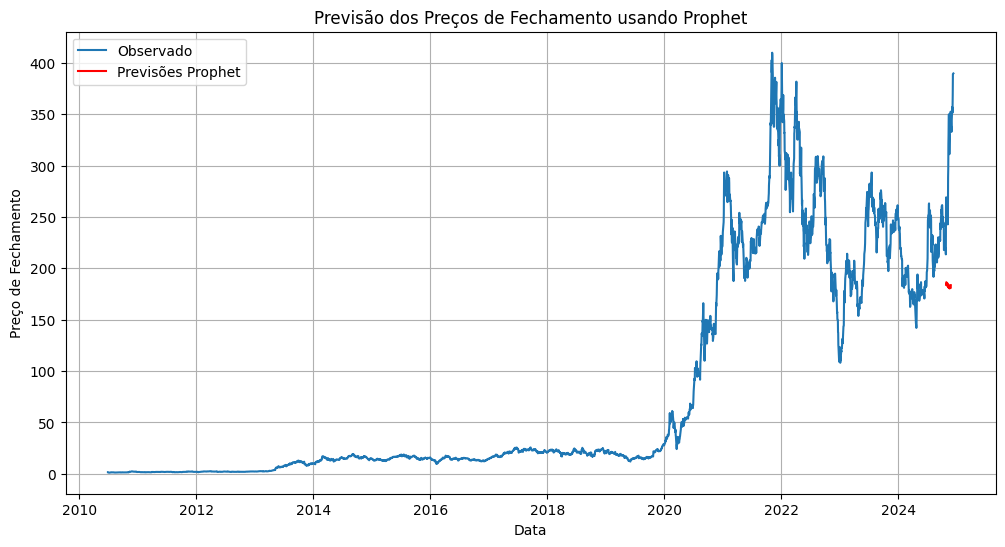

In [12]:
from prophet import Prophet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

# Preparando os dados para o Prophet
df_prophet = df.copy().reset_index()
df_prophet.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Dividindo os dados para treino e teste
train_data_prophet, test_data_prophet = train_test_split(df_prophet, test_size=30, shuffle=False)


# Modelo Prophet
model_prophet = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)
model_prophet.fit(train_data_prophet)

# Criando dataframe futuro
future_dates = pd.date_range(start=df_prophet['ds'].iloc[-31], periods=30)
future = pd.DataFrame({'ds': future_dates})

# Previsões
forecast = model_prophet.predict(future)

# Avaliação do modelo
rmse_prophet = sqrt(mean_squared_error(test_data_prophet['y'], forecast['yhat']))
print(f'RMSE (Prophet): {rmse_prophet}')


# Visualizar os resultados
plt.figure(figsize=(12, 6))
plt.plot(df_prophet['ds'], df_prophet['y'], label='Observado')
plt.plot(forecast['ds'], forecast['yhat'], label='Previsões Prophet', color='red')
plt.title('Previsão dos Preços de Fechamento usando Prophet')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.grid(True)
plt.show()

**Interpretação da Análise Prophet**

* Adaptação do DataFrame: Foi adaptado o DataFrame para o formato que o Prophet exige (colunas 'ds' para data e 'y' para os valores).

* Modelo: Foi utilizado um modelo Prophet com sazonalidades anuais e semanais.

* Previsões: O modelo foi usado para fazer as previsões.

* RMSE: O Root Mean Squared Error indica o erro do modelo.

* Visualização: O gráfico compara os valores reais com as previsões geradas pelo modelo Prophet.

## Modelo LSTM

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
RMSE (LSTM): 9.795972970227785


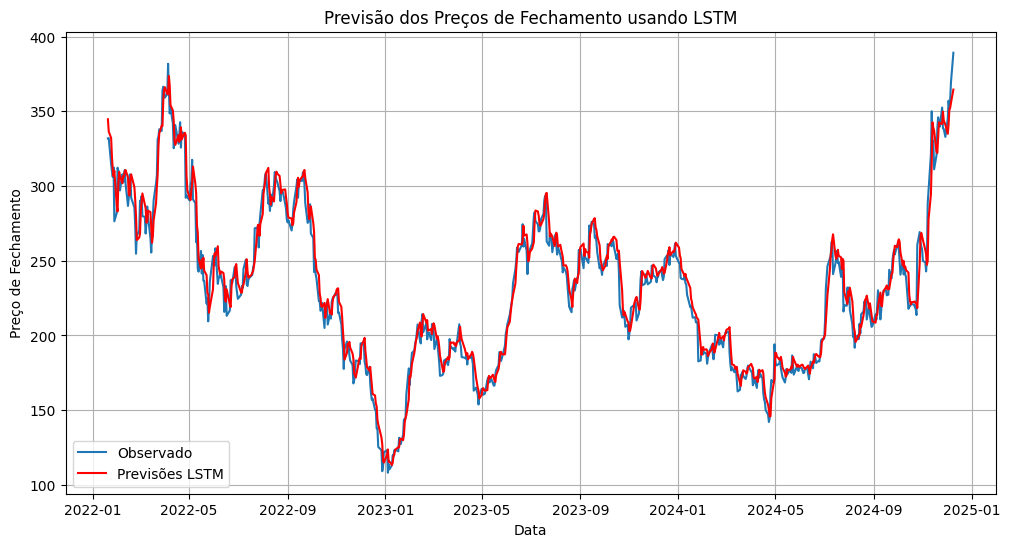

In [13]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Prepara os dados
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Função para criar conjuntos de dados com janela de tempo
def create_dataset(dataset, look_back=10):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 10 # Dias
X, y = create_dataset(scaled_data, look_back)

# Dividindo os dados
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Redimensiona para (amostras, steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# LSTM Model
model_lstm = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(1, look_back)),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dense(units=1)
])
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Treinamento do modelo
model_lstm.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

# Previsões
predictions_lstm = model_lstm.predict(X_test)
predictions_lstm = scaler.inverse_transform(predictions_lstm)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))


# Calculando o RMSE
rmse_lstm = sqrt(mean_squared_error(y_test, predictions_lstm))
print(f'RMSE (LSTM): {rmse_lstm}')


# Plot
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test, label='Observado')
plt.plot(df.index[-len(y_test):], predictions_lstm, label='Previsões LSTM', color='red')
plt.title('Previsão dos Preços de Fechamento usando LSTM')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.grid(True)
plt.show()

**Interpretação da Análise LSTM**

* Preparação dos Dados: Os dados foram escalados entre 0 e 1 com o MinMaxScaler.

* Criação de Janelas: Foi criada uma função para organizar as séries temporais em janelas de tempo.

* Modelo LSTM: Foi utilizado um modelo sequencial com duas camadas LSTM e uma camada densa.

* Treinamento e Previsão: O modelo foi treinado e fez as previsões nos dados de teste.

* RMSE: O Root Mean Squared Error indica o erro do modelo.

* Visualização: Foi criado um gráfico para comparação dos valores reais com as previsões geradas pelo modelo LSTM.

## Considerar Outros Fatores

> Vamos adicionar uma variável que represente o índice S&P 500, que é conhecido por influenciar as ações em geral. O objetivo é avaliar o impacto dessa nova variável no modelo.

In [14]:
df = pd.read_csv('/content/sp500_stocks.csv')
df.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-05,MMM,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-06,MMM,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-07,MMM,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-08,MMM,NaN,NaN,NaN,NaN,NaN,NaN


RMSE (Regressão Linear): 2.1339178629579463e-17


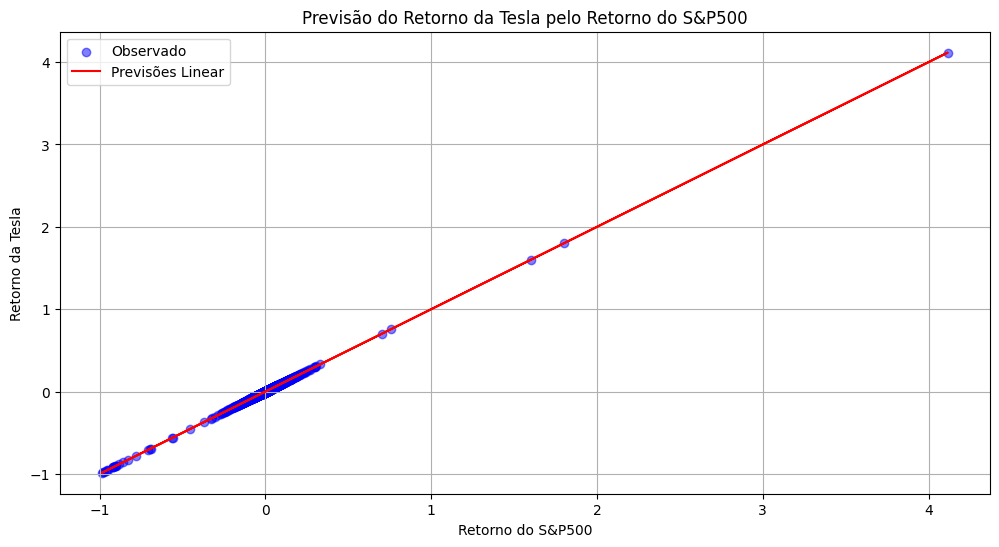

In [15]:
# Importa os dados do S&P 500
sp500_df = pd.read_csv('/content/sp500_stocks.csv')

# Seleciona apenas o 'Close' e renomeia para 'SP500'
sp500_df = sp500_df['Close'].rename('SP500')

# Junta os dataframes com o preço da tesla e o S&P500
df_merged = df.copy().join(sp500_df, how='inner')

# Calcula as variações percentuais
df_merged['Tesla_Return'] = df_merged['Close'].pct_change()
df_merged['SP500_Return'] = df_merged['SP500'].pct_change()

# Cria um modelo de regressão linear simples
from sklearn.linear_model import LinearRegression

# Limpa os dados removendo as linhas que possuem NaN
df_merged_clean = df_merged.dropna()
X = df_merged_clean['SP500_Return'].values.reshape(-1, 1)
y = df_merged_clean['Tesla_Return'].values.reshape(-1, 1)

# Divisão dos dados em treino e teste
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento e previsão do modelo
model_reg = LinearRegression()
model_reg.fit(X_train_reg, y_train_reg)
predictions_reg = model_reg.predict(X_test_reg)

# Avaliação do modelo
rmse_reg = sqrt(mean_squared_error(y_test_reg, predictions_reg))
print(f'RMSE (Regressão Linear): {rmse_reg}')

# Visualizar os resultados
plt.figure(figsize=(12, 6))
plt.scatter(X_test_reg, y_test_reg, color='blue', label='Observado', alpha = 0.5)
plt.plot(X_test_reg, predictions_reg, label='Previsões Linear', color='red')
plt.title('Previsão do Retorno da Tesla pelo Retorno do S&P500')
plt.xlabel('Retorno do S&P500')
plt.ylabel('Retorno da Tesla')
plt.legend()
plt.grid(True)
plt.show()

**Interpretação da Análise de Outros Fatores**

Dados do S&P 500: Os dados do índice S&P 500 foram baixados, tratados e unidos com os dados da Tesla.

Modelo de Regressão: Um modelo de regressão linear simples foi utilizado para analisar se a variação do índice S&P 500 impacta o valor da ação da Tesla.

RMSE: O Root Mean Squared Error indica a precisão do modelo.

Visualização: O gráfico compara os valores reais com as previsões feitas.

## Visualizações Adicionais

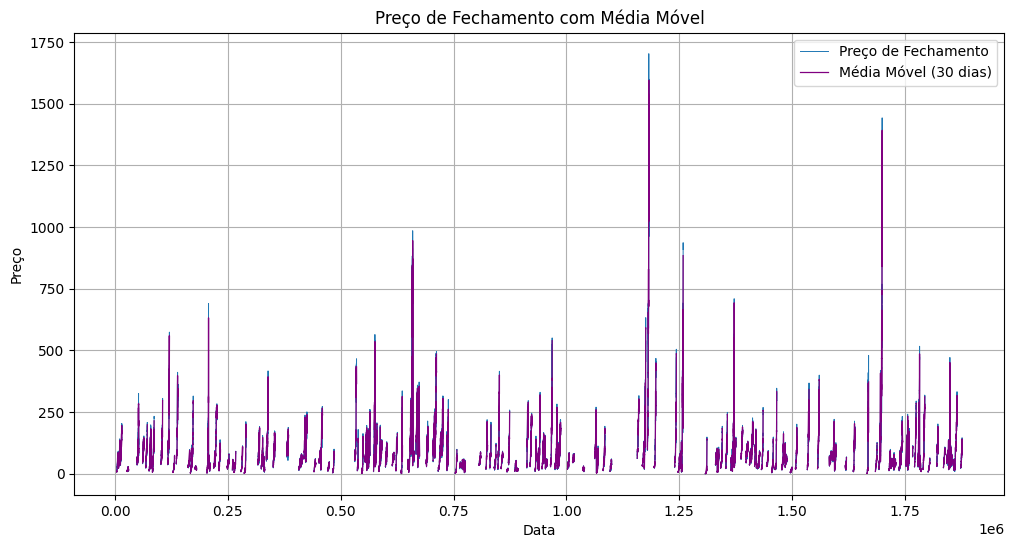

In [16]:
# Calcula média móvel
df['SMA_30'] = df['Close'].rolling(window=30).mean()

# Visualização
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Preço de Fechamento', linewidth=0.7)
plt.plot(df.index, df['SMA_30'], label='Média Móvel (30 dias)', color='purple', linewidth=0.9)
plt.title('Preço de Fechamento com Média Móvel')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.grid(True)
plt.show()

**Interpretação**

A média móvel suaviza os preços da ação, facilitando a visualização de tendência de longo prazo.